In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('Filtered_Surveys_Preprocessed.xlsx')

FileNotFoundError: ignored

In [ ]:
def remove_tonos(text):
    # Mapping of Greek characters with tonos to those without
    mapping = {
        'ά': 'α',
        'έ': 'ε',
        'ή': 'η',
        'ί': 'ι',
        'ό': 'ο',
        'ύ': 'υ',
        'ώ': 'ω'
    }
    return ''.join(mapping.get(c, c) for c in text)

In [ ]:
data = data.dropna(subset=['Comments'])

In [ ]:
data['Comments'] = data['Comments'].apply(remove_tonos)

In [ ]:
data.head()

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sentiment_counts = data['Sentiment'].value_counts()

In [ ]:
sentiment_counts

In [ ]:
sentiment_counts_df = pd.DataFrame({'Sentiment': sentiment_counts.index, 'Count': sentiment_counts.values})

In [ ]:
plt.bar(sentiment_counts_df['Sentiment'],sentiment_counts_df['Count'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiments Frequencies')
plt.show()

In [ ]:
greek_stopwords_str = "τουσ, χωρισ, σασ, γιατι, αδιακοπα, αι, ακομα, ακομη, ακριβως, αληθεια, αληθινα, αλλα, αλλαχου, αλλες, αλλη, αλλην, αλλης, αλλιως, αλλιωτικα, αλλο, αλλοι, αλλοιως, αλλοιωτικα, αλλον, αλλος, αλλοτε, αλλου, αλλους, αλλων, αμα, αμεσα, αμεσως, αν, ανα, αναμεσα, αναμεταξυ, ανευ, αντι, αντιπερα, αντις, ανω, ανωτερω, αξαφνα, απ, απεναντι, απο, αποψε, αρα, αραγε, αργα, αργοτερο, αριστερα, αρκετα, αρχικα, ας, αυριο, αυτα, αυτες, αυτη, αυτην, αυτης, αυτο, αυτοι, αυτον, αυτος, αυτου, αυτους, αυτων, αφοτου, αφου, βεβαια, βεβαιοτατα, γι, για, γρηγορα, γυρω, δα, δε, δεινα, δεν, δεξια, δηθεν, δηλαδη, δι, δια, διαρκως, δικα, δικο, δικοι, δικος, δικου, δικους, διολου, διπλα, διχως, εαν, εαυτο, εαυτον, εαυτου, εαυτους, εαυτων, εγκαιρα, εγκαιρως, εγω, εδω, ειδεμη, ειθε, ειμαι, ειμαστε, ειναι, εις, εισαι, εισαστε, ειστε, ειτε, ειχα, ειχαμε, ειχαν, ειχατε, ειχε, ειχες, εκαστα, εκαστες, εκαστη, εκαστην, εκαστης, εκαστο, εκαστοι, εκαστον, εκαστος, εκαστου, εκαστους, εκαστων, εκει, εκεινα, εκεινες, εκεινη, εκεινην, εκεινης, εκεινο, εκεινοι, εκεινον, εκεινος, εκεινου, εκεινους, εκεινων, εκτος, εμας, εμεις, εμενα, εμπρος, εν, ενα, εναν, ενας, ενος, εντελως, εντος, εντωμεταξυ, ενω, εξ, εξαφνα, εξης, εξισου, εξω, επανω, επειδη, επειτα, επι, επισης, επομενως, εσας, εσεις, εσενα, εστω, εσυ, ετερα, ετεραι, ετερας, ετερες, ετερη, ετερης, ετερο, ετεροι, ετερον, ετερος, ετερου, ετερους, ετερων, ετουτα, ετουτες, ετουτη, ετουτην, ετουτης, ετουτο, ετουτοι, ετουτον, ετουτος, ετουτου, ετουτους, ετουτων, ετσι, ευγε, ευθυς, ευτυχως, εφεξης, εχει, εχεις, εχετε, εχθες, εχομε, εχουμε, εχουν, εχτες, εχω, εως, η, ηδη, ημασταν, ημαστε, ημουν, ησασταν, ησαστε, ησουν, ηταν, ητανε, ητοι, ηττον, θα, ι, ιδια, ιδιαν, ιδιας, ιδιες, ιδιο, ιδιοι, ιδιον, ιδιος, ιδιου, ιδιους, ιδιων, ιδιως, ιι, ιιι, ισαμε, ισια, ισως, καθε, καθεμια, καθεμιας, καθενα, καθενας, καθενος, καθετι, καθολου, καθως, και, κακα, κακως, καλα, καλως, καμια, καμιαν, καμιας, καμποσα, καμποσες, καμποση, καμποσην, καμποσης, καμποσο, καμποσοι, καμποσον, καμποσος, καμποσου, καμποσους, καμποσων, κανεις, κανεν, κανενα, κανεναν, κανενας, κανενος, καποια, καποιαν, καποιας, καποιες, καποιο, καποιοι, καποιον, καποιος, καποιου, καποιους, καποιων, καποτε, καπου, καπως, κατ, κατα, κατι, κατιτι, κατοπιν, κατω, κιολας, κλπ, κοντα, κτλ, κυριως, λιγακι, λιγο, λιγωτερο, λογω, λοιπα, λοιπον, μα, μαζι, μακαρι, μακρυα, μαλιστα, μαλλον, μας, με, μεθαυριο, μειον, μελει, μελλεται, μεμιας, μεν, μερικα, μερικες, μερικοι, μερικους, μερικων, μεσα, μετ, μετα, μεταξυ, μεχρι, μη, μηδε, μην, μηπως, μητε, μια, μιαν, μιας, μολις, μολονοτι, μοναχα, μονες, μονη, μονην, μονης, μονο, μονοι, μονομιας, μονος, μονου, μονους, μονων, μου, μπορει, μπορουν, μπραβο, μπρος, να, ναι, νωρις, ξανα, ξαφνικα, ο, οι, ολα, ολες, ολη, ολην, ολης, ολο, ολογυρα, ολοι, ολον, ολονεν, ολος, ολοτελα, ολου, ολους, ολων, ολως, ολωσδιολου, ομως, οποια, οποιαδηποτε, οποιαν, οποιανδηποτε, οποιας, οποιασδηποτε, οποιδηποτε, οποιες, οποιεσδηποτε, οποιο, οποιοδηποτε, οποιοι, οποιον, οποιονδηποτε, οποιος, οποιοσδηποτε, οποιου, οποιουδηποτε, οποιους, οποιουσδηποτε, οποιων, οποιωνδηποτε, οποτε, οποτεδηποτε, οπου, οπουδηποτε, οπως, ορισμενα, ορισμενες, ορισμενων, ορισμενως, οσα, οσαδηποτε, οσες, οσεσδηποτε, οση, οσηδηποτε, οσην, οσηνδηποτε, οσης, οσησδηποτε, οσο, οσοδηποτε, οσοι, οσοιδηποτε, οσον, οσονδηποτε, οσος, οσοσδηποτε, οσου, οσουδηποτε, οσους, οσουσδηποτε, οσων, οσωνδηποτε, οταν, οτι, οτιδηποτε, οτου, ου, ουδε, ουτε, οχι, παλι, παντοτε, παντου, παντως, παρα, περα, περι, περιπου, περισσοτερο, περσι, περυσι, πια, πιθανον, πιο, πισω, πλαι, πλεον, πλην, ποια, ποιαν, ποιας, ποιες, ποιο, ποιοι, ποιον, ποιος, ποιου, ποιους, ποιων, πολυ, ποσες, ποση, ποσην, ποσης, ποσοι, ποσος, ποσους, ποτε, που, πουθε, πουθενα, πρεπει, πριν, προ, προκειμενου, προκειται, προπερσι, προς, προτου, προχθες, προχτες, πρωτυτερα, πως, σαν, σας, σε, σεις, σημερα, σιγα, σου, στα, στη, στην, στης, στις, στο, στον, στου, στους, στων, συγχρονως, συν, συναμα, συνεπως, συνηθως, συχνα, συχνας, συχνες, συχνη, συχνην, συχνης, συχνο, συχνοι, συχνον, συχνος, συχνου, συχνου, συχνους, συχνων, συχνως, σχεδον, σωστα, τα, ταδε, ταυτα, ταυτες, ταυτη, ταυτην, ταυτης, ταυτο,ταυτον, ταυτος, ταυτου, ταυτων, ταχα, ταχατε, τελικα, τελικως, τες, τετοια, τετοιαν, τετοιας, τετοιες, τετοιο, τετοιοι, τετοιον, τετοιος, τετοιου, τετοιους, τετοιων, τη, την, της, τι, τιποτα, τιποτε, τις, το, τοι, τον, τος, τοσα, τοσες, τοση, τοσην, τοσης, τοσο, τοσοι, τοσον, τοσος, τοσου, τοσους, τοσων, τοτε, του, τουλαχιστο, τουλαχιστον, τους, τουτα, τουτες, τουτη, τουτην, τουτης, τουτο, τουτοι, τουτοις, τουτον, τουτος, τουτου, τουτους, τουτων, τυχον, των, τωρα, υπ, υπερ, υπο, υποψη, υποψιν, υστερα, φετος, χαμηλα, χθες, χτες, χωρις, χωριστα, ψηλα, ω, ωραια, ως, ωσαν, ωσοτου, ωσπου, ωστε, ωστοσο, ωχ"

In [ ]:
greek_stopwords_list = [word.strip() for word in greek_stopwords_str.split(',')]

In [ ]:
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in greek_stopwords_list]  # Remove stopwords
    return ' '.join(filtered_words)  # Reassemble the text

In [ ]:
data['Comments_without_stop_words'] = data['Comments'].apply(remove_stopwords)

In [ ]:
!pip install spacy
!python -m spacy download el_core_news_sm

In [ ]:
import spacy

nlp = spacy.load("el_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [ ]:
data['Comments_lemmatized'] = data['Comments_without_stop_words'].apply(lemmatize_text)

In [ ]:
pip install transformers

In [ ]:
pip install torch

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
model = AutoModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

In [ ]:
data['Comments_tokenized'] = data['Comments_lemmatized'].apply(tokenizer.tokenize)

In [ ]:
# !pip install openpyxl
# data.to_excel('Filtered_Surveys_Preprocessed_v1.xlsx', engine='openpyxl')
# from google.colab import files
# files.download('Filtered_Surveys_Preprocessed_v1.xlsx')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Reinitialize the vectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=None, lowercase=True, token_pattern=r'\w+')

In [ ]:
# Vectorize the lemmatized comments
X_lemmatized = vectorizer.fit_transform(data['Comments_lemmatized'])

In [ ]:
# Define the number of topics we want to extract
n_topics = 3

# Apply LDA to the lemmatized data
lda_lemmatized = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', random_state=0)
lda_topics_lemmatized = lda_lemmatized.fit_transform(X_lemmatized)


In [ ]:
# Function
def display_topics(model, feature_names, no_top_words):
    """Display the top words for each topic."""
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics.append((topic_idx, topic_words))
    return topics

In [ ]:
# Define the number of top words to display for each topic
no_top_words = 10

# Display the topics from the lemmatized comments
topics_lemmatized = display_topics(lda_lemmatized, vectorizer.get_feature_names_out(), no_top_words)
topics_lemmatized


[(0,
  'εξυπηρετηση ευγενεια καλος γρηγορη ευγενικος αμεσος αμεσοτητα ευγενια προσωπικο υπαλληλου'),
 (1,
  'αμεση προβλημα vodafone επικοινωνια τεχνικος σημα καταστημα υπαρχω ευχαριστημενος λυση'),
 (2,
  'αψογος ταχυτητα ανταποκριση επιλυση εξυπηρετηθηκα υπαλληλοσςς ενημερωση αριστος εξυπηρετησε προβληματοσ')]

In [ ]:
# Define the topic names based on our interpretation
topic_names = [
    "Service Quality & Staff Interactions",
    "Technical Issues & Brand Interactions:",
    "Service Excellence & Problem Resolution"
]

In [ ]:
# Assign the dominant topic for each comment
data['Dominant_Topic'] = lda_topics_lemmatized.argmax(axis=1)

In [ ]:
# Map the dominant topic numbers to topic names
data['Dominant_Topic_Name'] = data['Dominant_Topic'].apply(lambda x: topic_names[x])

In [ ]:
# Merge the dominant topic name with the sentiment column
df_topic_name_sentiment = data[['Dominant_Topic_Name', 'Sentiment']]

# Calculate the distribution of sentiments for each topic name
sentiment_distribution_per_topic_name = df_topic_name_sentiment.groupby(['Dominant_Topic_Name', 'Sentiment']).size().unstack().fillna(0)

sentiment_distribution_per_topic_name

Sentiment,Negative,Neutral,Positive
Dominant_Topic_Name,,,
Service Excellence & Problem Resolution,533,357,2547
Service Quality & Staff Interactions,204,568,6826
Technical Issues & Brand Interactions:,1213,601,2107


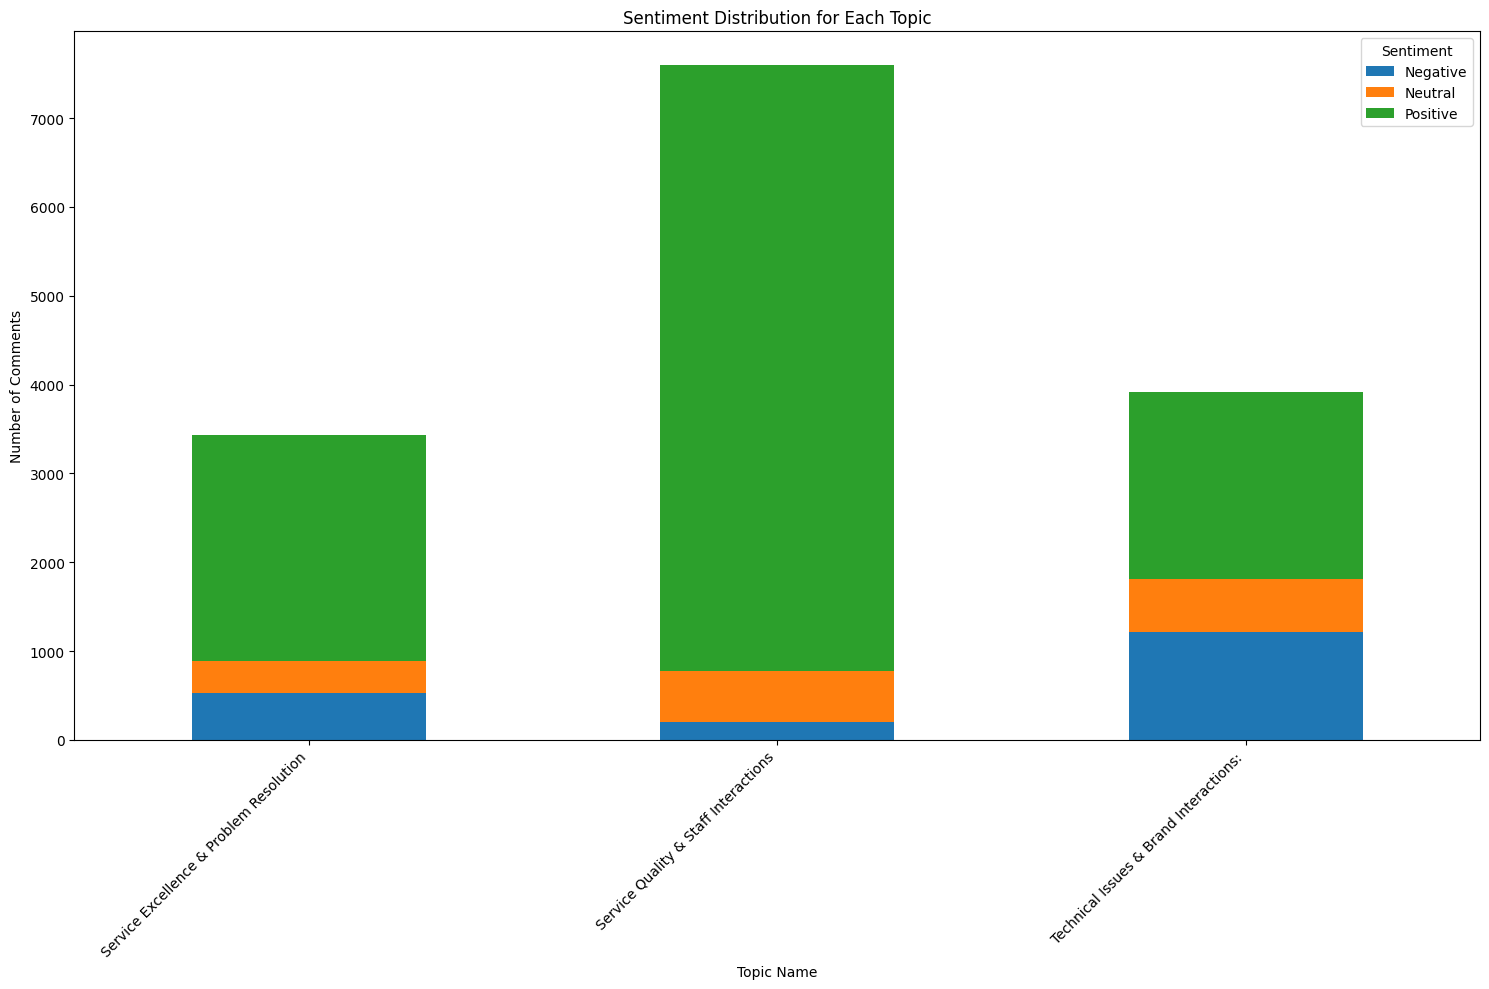

In [ ]:
import seaborn as sns

# Plotting
plt.figure(figsize=(15, 10))

# Plot the sentiment distribution for each topic
sentiment_distribution_per_topic_name.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Sentiment Distribution for Each Topic')
plt.ylabel('Number of Comments')
plt.xlabel('Topic Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
import torch
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
model.eval()  # set the model to evaluation mode

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(35000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
def generate_embeddings(text):
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings


In [ ]:
embeddings = []

for comment in data['Comments']:
    emb = generate_embeddings(comment)
    embeddings.append(emb.numpy())


In [ ]:
embeddings = np.vstack(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

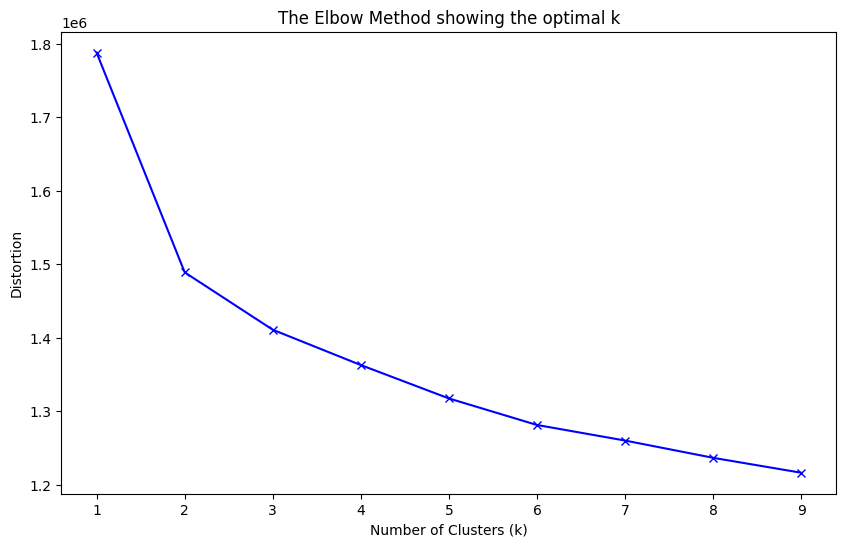

In [ ]:
# Calculate distortions for different number of clusters
distortions = []
K = range(1, 10)  # Let's check for up to 15 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(embeddings)
    distortions.append(kmeans.inertia_)

# Plot the distortions to see the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++').fit(embeddings)
# data['Cluster'] = kmeans.labels_
data['Cluster'] = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for cluster_num in range(2):
    print(f"Cluster {cluster_num} samples:")
    print(data[data['Cluster'] == cluster_num]['Comments'].sample(10))
    print("\n")

Cluster 0 samples:
5037                             ηταν ευγενικοσ βοηθησει .
11528    υπαλληλοσς ητανε πολυ ευγενικη ηξερε πολυ καλο...
871                               υπαλληλοσς ηταν αψογοσ !
10847                             κακο σημα καποιεσ φορεσς
5868                            εξυπηρετεισαν πολυ γρηγορο
4543     σασ πληρωνω αρκετος χρονι οταν ηρθε στιγμη ανα...
7500     επαναλαμβανομαι ιδιος προβλημα τακτα διαστημα ...
11246                          ρωτησα ελαβα απαντηση αμεσα
10212                  αμεσος αποτελεσμα δευς επισκεψη μου
5185               γρηγορη εξυπηρετηση , φιλικο περιβαλλον
Name: Comments, dtype: object


Cluster 1 samples:
6860     αμεση εξυπηρετηση ευγενεια
622                      Fair offer
14462                   εξυπηρετηση
430              τελεια εξυπηρετηση
1428              Άμεση εξυπηρετηση
3523                  εξυπηρετηθηκα
6435             αμεσοτητα ευγενεια
9202                       ολα καλα
12804             καλος εξυπηρετηση
10              

In [ ]:
data['Cluster'].value_counts()

0    10393
1     4563
Name: Cluster, dtype: int64

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
from sklearn.manifold import TSNE

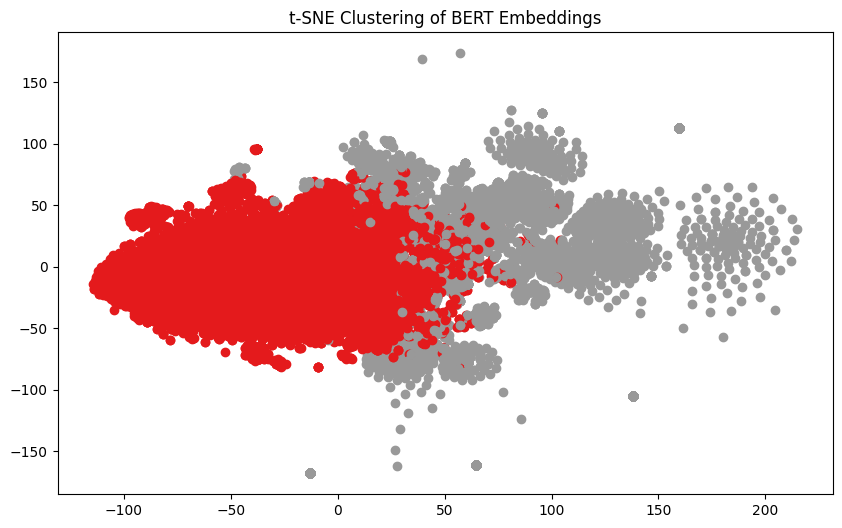

In [ ]:
# Apply t-SNE for dimensionality reduction
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], color=plt.cm.Set1(data['Cluster'][i] / float(max(data['Cluster']))))
plt.title("t-SNE Clustering of BERT Embeddings")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Apply DBSCAN
db = DBSCAN(eps=5, min_samples=30).fit(embeddings)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# DBSCAN operates by distinguishing between core points, border points, and noise points.
# In this segment, we create a boolean mask to identify which points are core points.
# Core points are central to the notion of a "cluster" in DBSCAN.

In [ ]:
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Here, we calculate the total number of unique clusters identified by DBSCAN
# (excluding noise) and the total number of noise points.

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 17
Estimated number of noise points: 12826


In [ ]:
# Applying t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=0)
new_values = tsne.fit_transform(embeddings)

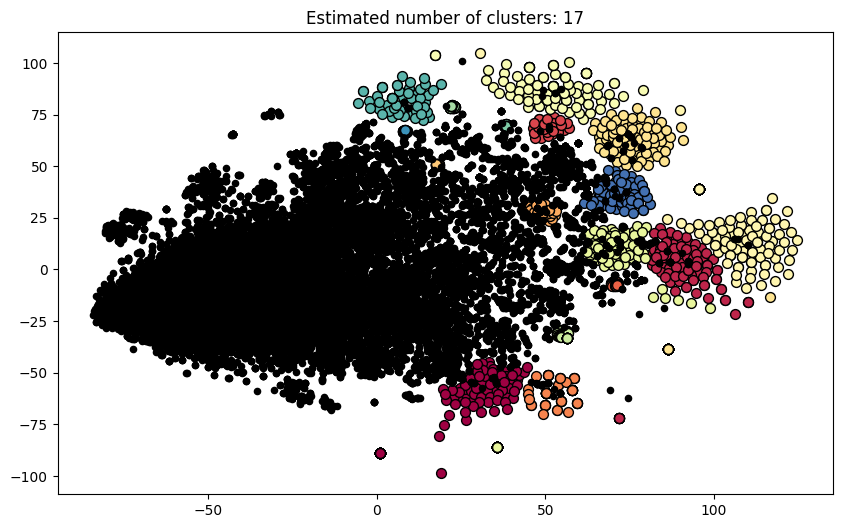

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise
    class_member_mask = (labels == k)
    plt.scatter(new_values[class_member_mask & core_samples_mask][:, 0],
                new_values[class_member_mask & core_samples_mask][:, 1], s=50, c=[col], edgecolors='k')
    plt.scatter(new_values[class_member_mask & ~core_samples_mask][:, 0],
                new_values[class_member_mask & ~core_samples_mask][:, 1], s=20, c=[col], edgecolors='k')
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

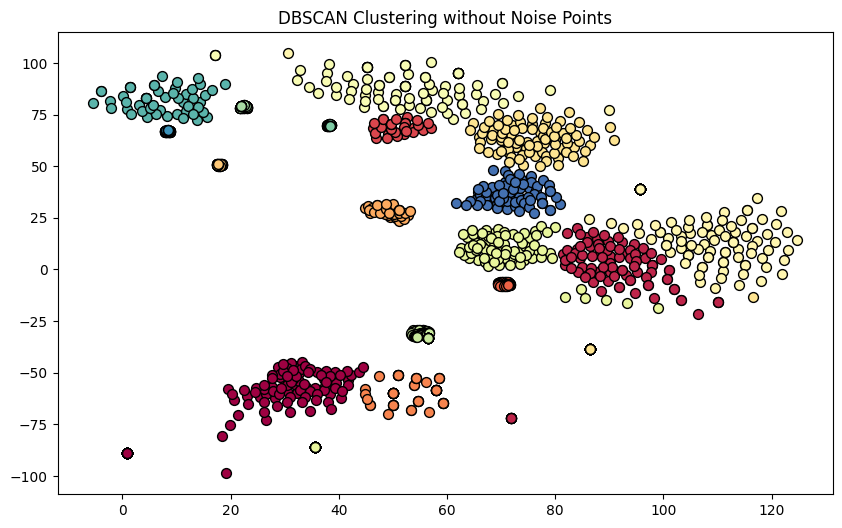

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
unique_labels = set(labels)

# Create a color map
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:  # Noise points are labeled -1 by DBSCAN
        continue  # Skip noise points

    class_member_mask = (labels == k)
    plt.scatter(new_values[class_member_mask][:, 0],
                new_values[class_member_mask][:, 1], s=50, c=[col], edgecolors='k')

plt.title('DBSCAN Clustering without Noise Points')
plt.show()

In [ ]:
# Assuming your data is in a DataFrame data and the column with comments is named 'Comments'
# Also assuming labels is the list of labels obtained from DBSCAN

data['Cluster_dbscan'] = labels  # Add the cluster labels to the dataframe

for cluster in set(labels):
    if cluster != -1:  # Exclude the noise
        print(f"\nCluster {cluster} samples:")
        sample_comments = data[data['Cluster_dbscan'] == cluster]['Comments'].sample(10, replace=True)
        # Using replace=True to ensure we get 10 samples even if the cluster has fewer members
        for comment in sample_comments:
            print(comment)



Cluster 0 samples:
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση
αψογος εξυπηρετηση

Cluster 1 samples:
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση
γρηγορη εξυπηρετηση

Cluster 2 samples:
ευγενια
ευγενια
ευγενια
ευγενια
ευγενια
ευγενια
ευγενια
ευγενια
ευγενια
ευγενια

Cluster 3 samples:
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση
τελεια εξυπηρετηση

Cluster 4 samples:
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση
αριστος εξυπηρετηση

Cluster 5 samples:
αμεση εξυπηρετηση .


In [ ]:
data = pd.read_excel('Filtered_Surveys_Preprocessed_v1.xlsx')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer using the 'Comments' column
vectorizer = TfidfVectorizer(max_df=0.85, max_features=100, stop_words=None)

# Fit and transform the comments
tfidf_matrix = vectorizer.fit_transform(data['Comments_without_stop_words'].values.astype('U'))

# Get the feature names (words/terms)
feature_names = vectorizer.get_feature_names_out()

feature_names


array(['10', 'vodafone', 'άμεση', 'αιτημα', 'αμεση', 'αμεσος',
       'αμεσοτητα', 'αναμονη', 'ανανεωση', 'ανταποκριση', 'απαντηση',
       'αποτελεσμα', 'αποτελεσματικος', 'αποτελεσματικοτητα', 'αριστος',
       'αψογος', 'γνωση', 'γρηγορη', 'γρηγορο', 'διαθεση', 'δουλεια',
       'δυο', 'εγινε', 'εκπροσωπος', 'εκπροσωποσ', 'εμεινος', 'ενημερωση',
       'εξαιρετικη', 'εξαιρετικος', 'εξυπηρετηθηκα', 'εξυπηρετησε',
       'εξυπηρετηση', 'εξυπηρετησησ', 'εξυπηρετικοι', 'εξυπηρετικος',
       'εξυπηρετικοσ', 'επαγγελματισμοσ', 'επικοινωνια', 'επιλυση',
       'εταιρεια', 'ευγενεια', 'ευγενια', 'ευγενικη', 'ευγενικο',
       'ευγενικος', 'ευγενικοσ', 'ευχαριστημενος', 'ευχαριστημενοσ',
       'ευχαριστω', 'ευχαριστως', 'θεμα', 'ιντερνετς', 'καλη', 'καλο',
       'καλος', 'κανω', 'κατανοηση', 'καταστημα', 'κοπελα', 'κυρια',
       'λυνω', 'λυση', 'μασ', 'μιλησα', 'μπορω', 'πακετος', 'παντα',
       'πελατεσ', 'πελατησ', 'πελατων', 'περιμενω', 'προβλημα',
       'προβληματοσ', 'προσφορα', '

In [ ]:
aspect_mapping = {
    'vodafone': 'Εταιρεία',
    'εταιρεια': 'Εταιρεία',
    'εκπροσωπος': 'Προσωπικό',
    'εκπροσωποσ': 'Προσωπικό',
    'προσωπικο': 'Προσωπικό',
    'τεχνικος': 'Προσωπικό',
    'τεχνικοσ': 'Προσωπικό',
    'υπαλληλο': 'Προσωπικό',
    'υπαλληλος': 'Προσωπικό',
    'υπαλληλοσ': 'Προσωπικό',
    'υπαλληλοσς': 'Προσωπικό',
    'υπαλληλου': 'Προσωπικό',
    'επικοινωνια': 'Επικοινωνία',
    'ιντερνετς': 'Internet',
    'καταστημα': 'Κατάστημα',
    'προσφορα': 'Προσφορά',
    'πακετος': 'Προσφορά',
    'συμβολαιο': 'Συμβόλαιο',
    'συμβολαιος': 'Συμβόλαιο',
    'σημα': 'Σήμα',

}

In [ ]:
# Given a comment and an aspect term, we want to capture the context (a window of words)
# around the aspect term.
def extract_context(comment, aspect, window=5):
    words = comment.split()
    if aspect in words:
        idx = words.index(aspect)
        start = max(0, idx - window)
        end = min(len(words), idx + window + 1)
        return ' '.join(words[start:end])
    return None


In [ ]:
contexts = []
sentiments = []

for idx, row in data.iterrows():
    comment = row['Comments']
    sentiment = row['Sentiment']
    for aspect, mapped_aspect in aspect_mapping.items():
        context = extract_context(comment, aspect)
        if context:
            contexts.append({
                'aspect': mapped_aspect,
                'context': context
            })
            sentiments.append(sentiment)  # Storing sentiment label for the context


In [ ]:
from sklearn.model_selection import train_test_split

X = [item['context'] for item in contexts]
y = sentiments  # Sentiment labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install transformers
!pip install (torch|tensorflow)
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

model_name = "nlpaueb/bert-base-greek-uncased-v1"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Assuming 3 sentiment labels: negative, neutral, positive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.2 MB/s eta 0:00:00
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install (torch|tensorflow)'


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/bert-base-greek-uncased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install datasets

In [ ]:
# Convert your training and validation data into a format suitable for the model.

from torch.utils.data import Dataset


class GreekSentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = GreekSentimentDataset(X_train, y_train, tokenizer)
val_dataset = GreekSentimentDataset(X_test, y_test, tokenizer)



In [ ]:
!pip install accelerate -U
!pip install transformers[torch]